# Digit Recognizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from utils import plot_images
%matplotlib inline
sns.set(style="dark", rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.color_palette("Paired"))

In [2]:
data = pd.read_csv('dataset/train.csv') # This data will be split into train, test, valid
submission_test = pd.read_csv('dataset/test.csv').sample(frac=1) # submission_test is the dataset we are using for the submission
Xtrain, Xtest = train_test_split(data, test_size=0.2)
Xtrain, Xvalid = train_test_split(Xtrain, test_size=0.2)

Ytrain = Xtrain.pop('label')
Ytest = Xtest.pop('label')
Yvalid = Xvalid.pop('label')

In [3]:
Xtrain.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Ytrain.head()

1632     8
8735     2
11767    8
18705    1
16255    2
Name: label, dtype: int64

In [5]:
Xtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Ytest.head()

31444    8
40848    0
509      7
26788    6
25106    7
Name: label, dtype: int64

In [7]:
Xvalid.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Yvalid.head()

26756    0
11103    0
28366    8
18688    1
19124    5
Name: label, dtype: int64

In [9]:
num_train = len(Xtrain)
num_test = len(Xtest)
num_valid = len(Xvalid)
total_examples = num_train + num_test + num_valid
print("There are " + str(num_train) + " training examples")
print("There are " + str(num_test) + " test examples")
print("There are " + str(num_valid) + " validation examples")
print(str(num_train/total_examples*100) + "% of the total data set is train.")
print(str(num_test/total_examples*100) + "% of the total dat set is test.")
print(str(num_valid/total_examples*100) + "% of the total dat set is valid.")

There are 26880 training examples
There are 8400 test examples
There are 6720 validation examples
64.0% of the total data set is train.
20.0% of the total dat set is test.
16.0% of the total dat set is valid.


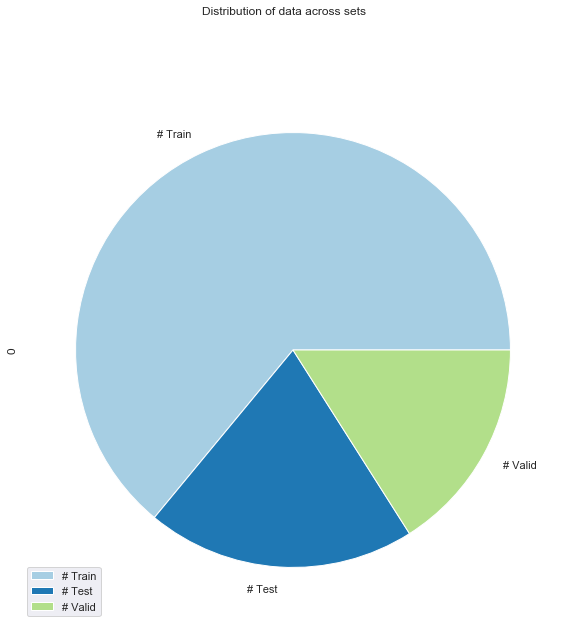

In [10]:
all_data = pd.DataFrame([num_train, num_test, num_valid],index=['# Train', '# Test', '# Valid'])
all_data.plot.pie(subplots=True, figsize=(10, 10), title="Distribution of data across sets")
plt.show()

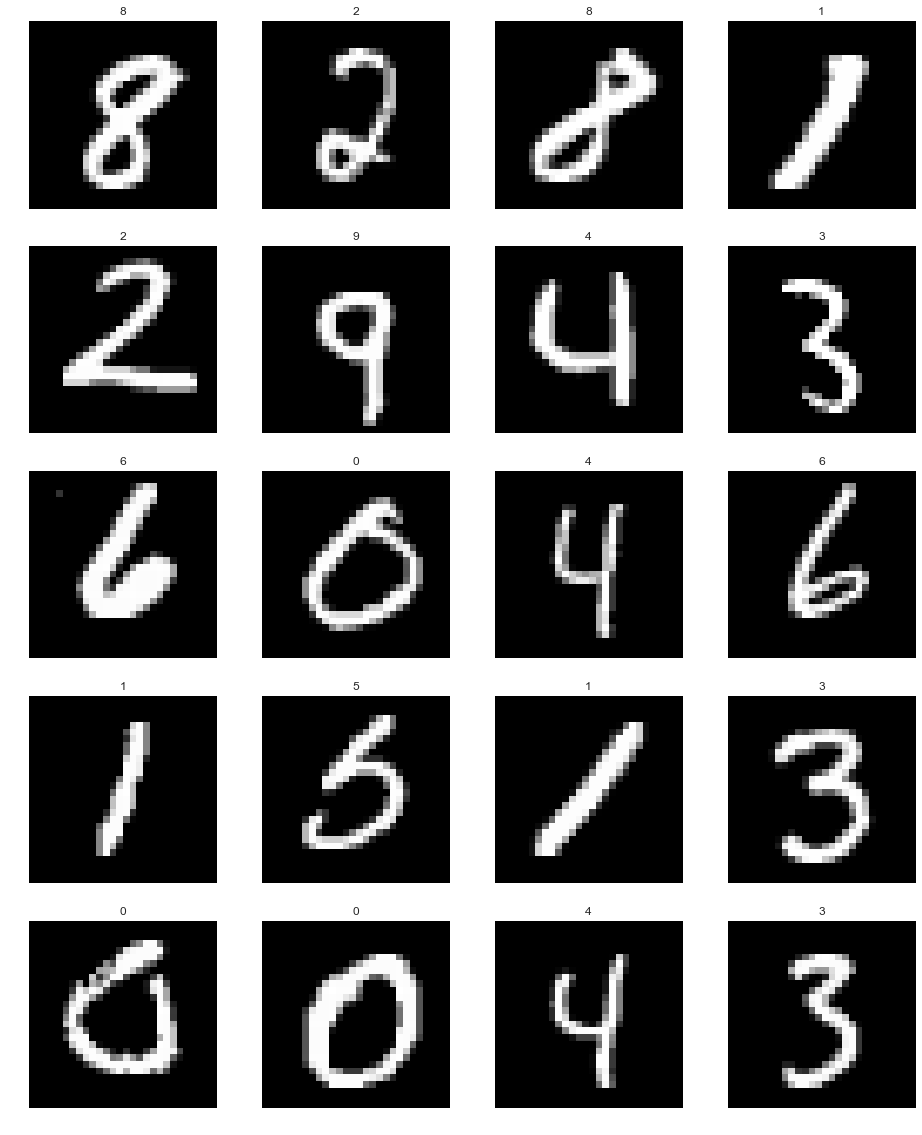

In [11]:
plot_images(Xtrain.head(20).values.reshape((-1, 28, 28)), cols=4, labels=Ytrain.head(20).values)

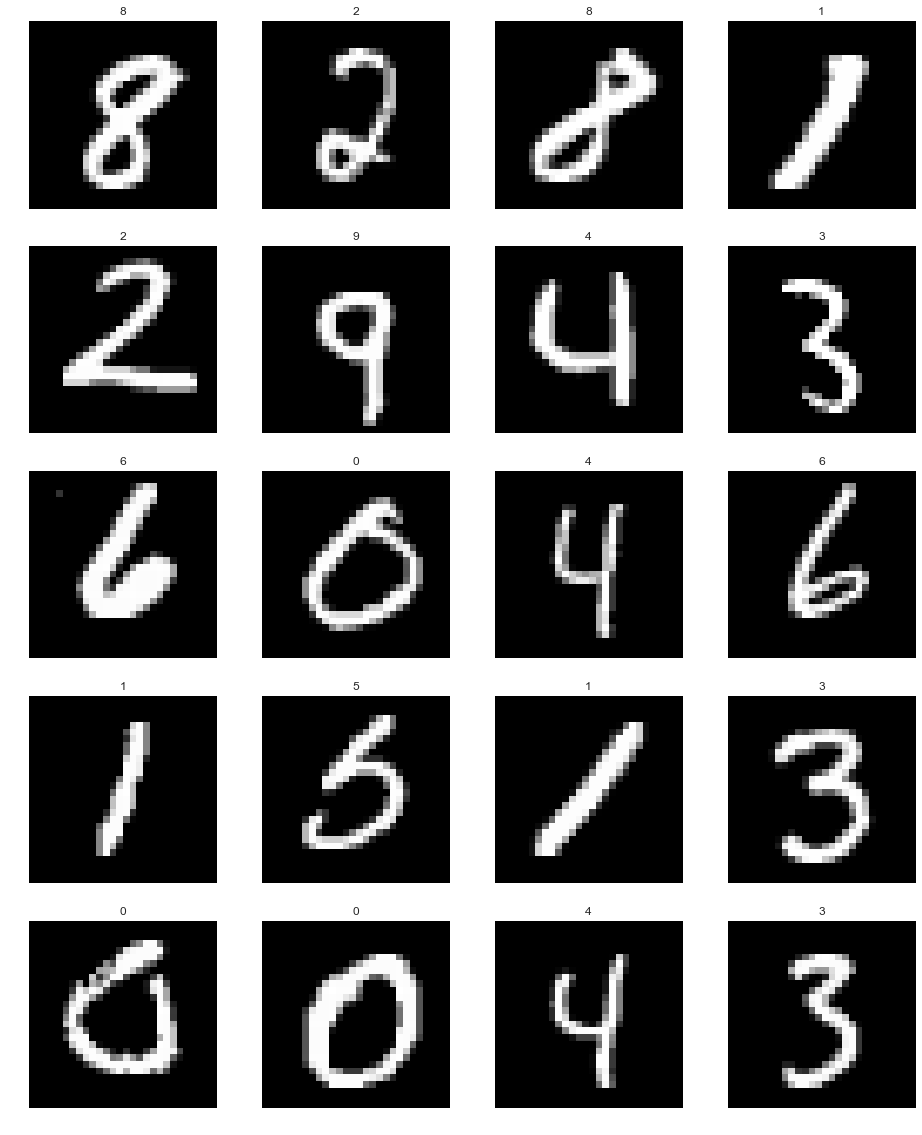

In [12]:
normalized_Xtrain_sample = Xtrain.head(20).values.reshape(-1, 28, 28) / 255.0
plot_images(normalized_Xtrain_sample, cols=4, labels=Ytrain.head(20).values)

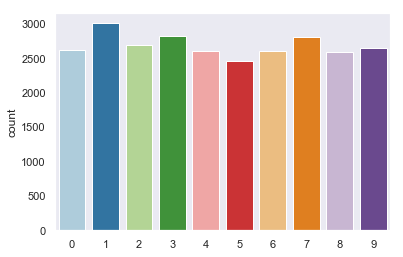

In [13]:
sns.countplot(Ytrain.values)
plt.show()

In [14]:
Xtrain = Xtrain.values.reshape(-1, 28, 28, 1) / 255.0
Xvalid = Xvalid.values.reshape(-1, 28, 28, 1) / 255.0
Xtest = Xtest.values.reshape(-1, 28, 28, 1) / 255.0

train_data = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain.values)).shuffle(len(Xtrain)).batch(32)
valid_data = tf.data.Dataset.from_tensor_slices((Xvalid, Yvalid.values)).batch(32)
test_data = tf.data.Dataset.from_tensor_slices((Xtest, Ytest.values))

In [15]:
from digit_recognition import DigitRecognitionModel, DigitRecognition

In [16]:
EPOCHS = 50
model = DigitRecognitionModel()
learn_rate = 3e-4
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr=learn_rate)
dr = DigitRecognition(
    model,
    optimizer,
    loss_object,
    train_data,
    valid_data,
    test_data
)

dr.fit(EPOCHS)

Epoch 1, Train Loss: 0.34377825260162354, Train Accuracy: 90.33853912353516, Validation Loss: 0.12739932537078857, Validation Accuracy: 96.14583587646484
Epoch 2, Train Loss: 0.2192438244819641, Train Accuracy: 93.77046203613281, Validation Loss: 0.10302310436964035, Validation Accuracy: 96.83035278320312
Epoch 3, Train Loss: 0.16755566000938416, Train Accuracy: 95.19469451904297, Validation Loss: 0.08906517922878265, Validation Accuracy: 97.24702453613281
Epoch 4, Train Loss: 0.13785120844841003, Train Accuracy: 96.03794860839844, Validation Loss: 0.08072412759065628, Validation Accuracy: 97.50372314453125
Epoch 5, Train Loss: 0.11795204132795334, Train Accuracy: 96.60044860839844, Validation Loss: 0.07556019723415375, Validation Accuracy: 97.65178680419922
Epoch 6, Train Loss: 0.10334578156471252, Train Accuracy: 97.01637268066406, Validation Loss: 0.07258693128824234, Validation Accuracy: 97.75297546386719
Epoch 7, Train Loss: 0.0920032188296318, Train Accuracy: 97.34162902832031, V

In [17]:
model.summary()

Model: "digit_recognition_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18464     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  147584    
_________________________________________________________________
dropout (Dropout)            multiple      

In [18]:
model.save_weights('digit_recognizer.h5')